# Clustering

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.DataFrame(
    data={
        'x0': [7,5,7,3,4,1,0,2,8,6,5,3],
        'x1': [5,7,7,3,6,4,0,2,7,8,5,7]
    })
df

,x0,x1
0,7,5
1,5,7
2,7,7
3,3,3
4,4,6
5,1,4
6,0,0
7,2,2
8,8,7
9,6,8


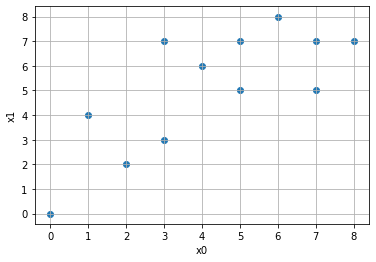

In [44]:
plt.scatter(df['x0'],df['x1'])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()

## Forming 2 Clusters

In [37]:
from sklearn.cluster import KMeans 

kmeans = KMeans(n_clusters=2, init='random')
y_kmeans = kmeans.fit_predict(df)
print(y_kmeans)
c = kmeans.cluster_centers_
c

[1 1 1 0 1 0 0 0 1 1 1 1]


array([[1.5  , 2.25 ],
       [5.625, 6.5  ]])

In [38]:
kmeans.labels_

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1])

In [39]:
print(kmeans.inertia_) # sum of squared distance to closest cluster

41.625


In [45]:
print('Clusters formed in {0} iterations'.format (kmeans.n_iter_))

Clusters formed in 4 iterations


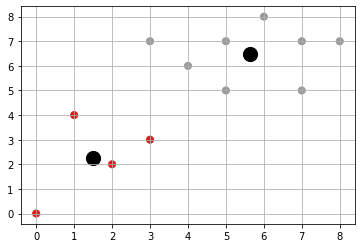

In [46]:
plt.scatter(df['x0'],df['x1'],c = y_kmeans,s=50, cmap='Set1')
plt.scatter(c[:,0],c[:,1],c= 'black', s=200)
plt.grid()

## Distance between centroid and other cluster points

In [9]:
c1_centroid= c[0]
c2_centroid= c[1]

cluster1_points=df[y_kmeans==0]
cluster2_points=df[y_kmeans==1]
print(cluster1_points)
print(cluster2_points)

c1_distances=cluster1_points.apply(lambda x: np.sqrt((x[0]-c1_centroid[0])**2 + (x[1]-c1_centroid[1])**2),axis=1)
c2_distances=cluster2_points.apply(lambda x: np.sqrt((x[0]-c2_centroid[0])**2 + (x[1]-c2_centroid[1])**2),axis=1)

print(c1_distances)
print(c2_distances)

print(c1_distances.mean())
print(c2_distances.mean())

    x0  x1
0    7   5
1    5   7
2    7   7
4    4   6
8    8   7
9    6   8
10   5   5
11   3   7
   x0  x1
3   3   3
5   1   4
6   0   0
7   2   2
0     2.034853
1     0.800391
2     1.463087
4     1.700184
8     2.427061
9     1.546165
10    1.625000
11    2.672195
dtype: float64
3    1.677051
5    1.820027
6    2.704163
7    0.559017
dtype: float64
1.783616848362815
1.6900647266044777


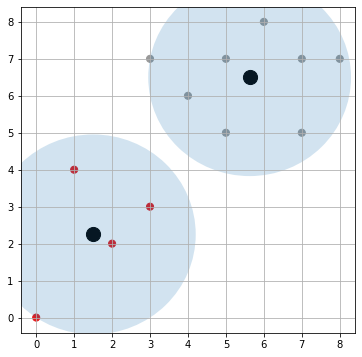

In [48]:
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection

fig, ax = plt.subplots(figsize=(6,6))

plt.scatter(df['x0'],df['x1'],c=y_kmeans,s=50,cmap='Set1')
plt.scatter(c[:,0],c[:,1] ,c='black',s=200 )

circle1= plt.Circle(c1_centroid,c1_distances.max(),alpha=0.2)
circle2= plt.Circle(c2_centroid,c2_distances.max(),alpha=0.2)

ax.add_artist(circle1)
ax.add_artist(circle2)

plt.grid()

### Elbow method to determine optimum cluster

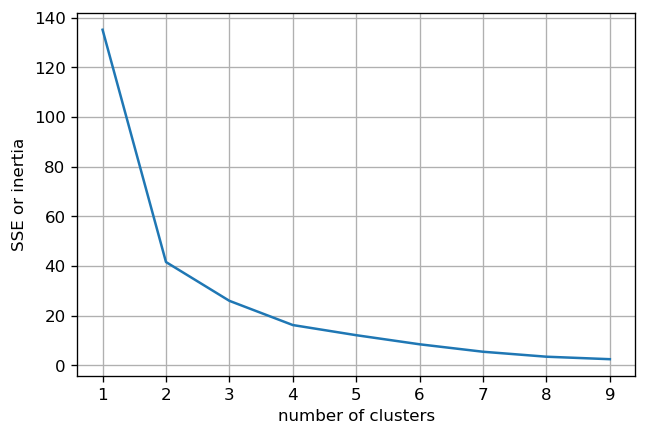

In [11]:
sse={}
for k in range(1,10):
    kmeans=KMeans(init='k-means++',n_clusters=k,max_iter=1000).fit(df)
    sse[k]=kmeans.inertia_
    
plt.figure(dpi=120)
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel("number of clusters")
plt.ylabel('SSE or inertia')
plt.grid()

### Silhouette coefficient

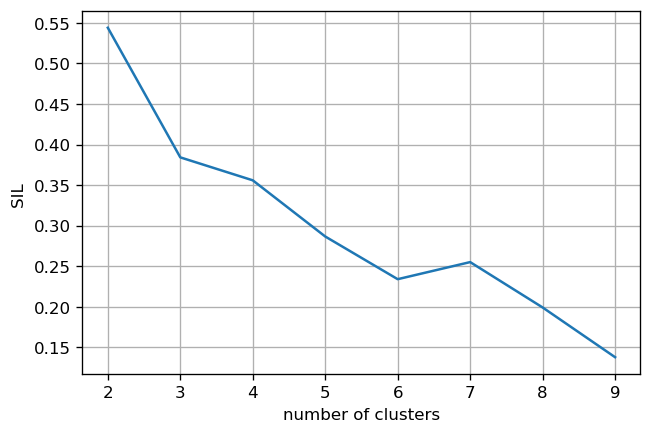

In [12]:
from sklearn.metrics import silhouette_score 
sil={}
for k in range(2,10):
    kmeans=KMeans(init='k-means++',n_clusters=k,max_iter=1000).fit(df)
    label=kmeans.labels_
    sil_coeff = silhouette_score(df,label,metric='euclidean')
    sil[k]=sil_coeff
plt.figure(dpi=120)
plt.plot(list(sil.keys()),list(sil.values()))
plt.xlabel("number of clusters")
plt.ylabel('SIL ')
plt.grid()